# Assignment-1: Data Visualization with Haberman Dataset [M]

 Data Description:
        
        The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the 
        University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast 
        cancer.
        
        Refrence Link - https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed

In [10]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
haberman=pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#This gives the number of rows and columns 
haberman.shape

(306, 4)

In [4]:
#Check whether any rows and columns contain NULL values or not 
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


This shows that this dataset doesn't conatin any null value

In [5]:
# This gives the features/column name
haberman.columns


Index(['age', 'year', 'nodes', 'status'], dtype='object')

Attribute Information:

    'age'- Age of patient at time of operation (numerical)
    'year'- Patient’s year of operation (year — 1900, numerical)
    'nodes'- Number of positive auxillary nodes detected (numerical)
    'status'- Survival status (class attribute) 1 = the patient survived 5 years or longer,                
               2 = the patient died within 5 years

In [6]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Obsevation:
    
   1)The age of patient is between 30 to 83. The minimun age of patient is 30 and maximun age is 83 with median of 52.

   2)The maximum number of nodes is 52,nearly 75% of patients have less than 5 nodes and 25% patients have no nodes.
    
    
    
      
    

In [7]:
#This Gives the number of Classes
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation:
    
    This gives the number of patient survived or not survived 
    Here,1 = the patient survived 5 years or longer
         2 = the patient died within 5 years
    This dataset is imbalance. 
    This gives the (225) 73% of people survied 5 years or longer
    and remaining (81) 27% is died within 5 years
    

# Objective:
    
    Here the objective is to predict whether the patient will survive after 5 years or not based upon 
    the patient’s age, year of treatment and the number of positive lymph nodes.

Performing Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

# Univariate Analysis (1-D)

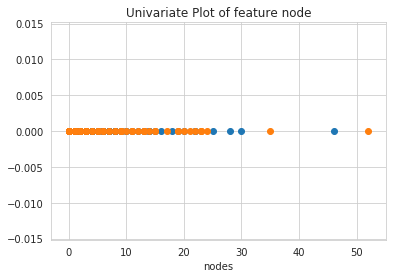

In [48]:
haberman_survival=haberman.loc[haberman['status']==1]
haberman_not_survival=haberman.loc[haberman['status']==2]

plt.scatter(haberman_survival['nodes'],np.zeros_like(haberman_survival['nodes']))
plt.scatter(haberman_not_survival['nodes'],np.zeros_like(haberman_not_survival['nodes']))
plt.xlabel("nodes")
plt.title('Univariate Plot of feature node')
plt.show()



Conclusion:
    
    Very hard to make sense as points are overlapping a lot.

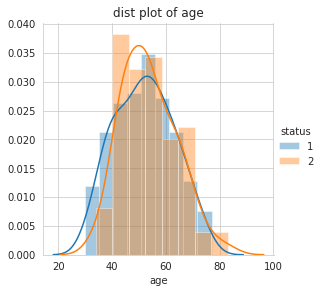

In [29]:
#By using seaborn to make it more clear (1-D) 
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'age').add_legend()
plt.title("dist plot of age")
plt.show()

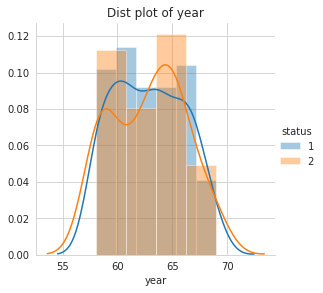

In [30]:
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'year').add_legend()
plt.title("Dist plot of year")
plt.show()

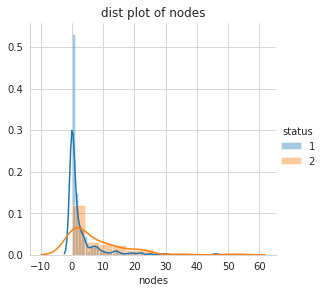

In [31]:
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'nodes').add_legend()
plt.title('dist plot of nodes')
plt.show()

Observation:
    
   - In  these plots (age,year) they overlapped a lot we can't distinguish among them.
   - By the nodes plot somehow we can distinguish between survival or not survival
   - By this we can also observe that the patient gets operated after year 59 have more survial rate than 
     before year 59.

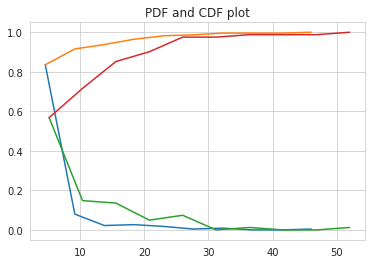

In [34]:
#Histograms and Probability Density Functions (PDF) using KDE and Cumulative Distribution Function (CDF)
counts,bin_edge=np.histogram(haberman_survival['nodes'], bins=10, density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts,bin_edge=np.histogram(haberman_not_survival['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.title("PDF and CDF plot")
plt.show()

 Mean , Median , Std

In [97]:
haberman.groupby('status').mean()

,age,year,nodes
status,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


In [98]:
haberman.groupby('status').median()

,age,year,nodes
status,,,
1,52,63,0
2,53,63,4


In [99]:
haberman.groupby('status').std()

,age,year,nodes
status,,,
1,11.012154,3.222915,5.870318
2,10.167137,3.342118,9.185654


observation:
    
    - This gives the mean,median,std of 1(survival 5 year or longer) and 2(died within 5 year) of age, year , nodes
    - Here we can see that mean,median,std difference between age and year is similar for both 1 and 2 status
    - But in 'nodes' there is difference between mean,median,std.
    - So here we can say that the 'nodes' is important feature to determine whether the patient is survive or not


 Percentile, Quantile

In [102]:
print("Quantiles of survival or not survival")
print("This prints the quantile of survival based on number of nodes",format(np.percentile(haberman_survival['nodes'], np.arange(0,100,25))))
print("This prints the quantile of Not survival based on number of nodes",format(np.percentile(haberman_not_survival['nodes'], np.arange(0,100,25))))
print("\n90 percentile:\n")
print("90 percent of patient survive whose nodes is less than",format(np.percentile(haberman_survival['nodes'],90)))
print("90 percent of patient not survive whose nodes is less than",format(np.percentile(haberman_not_survival['nodes'],90)))


Quantiles of survival or not survival
This prints the quantile of survival based on number of nodes [0. 0. 0. 3.]
This prints the quantile of Not survival based on number of nodes [ 0.  1.  4. 11.]

90 percentile:

90 percent of patient survive whose nodes is less than 8.0
90 percent of patient not survive whose nodes is less than 20.0


Observation: 
    
    By this we can conclude that the patient whose nodes are less is more likely to survive compared to those  having more number of nodes.

# Box plot and Whiskers

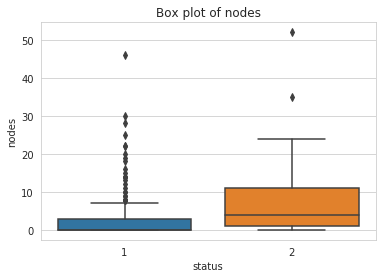

In [36]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title('Box plot of nodes')
plt.show()

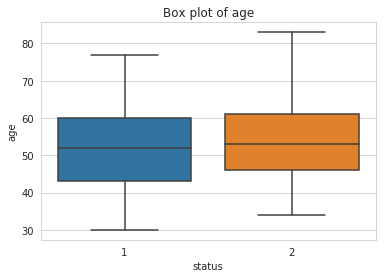

In [39]:
sns.boxplot(x='status',y='age',data=haberman)
plt.title('Box plot of age')
plt.show()

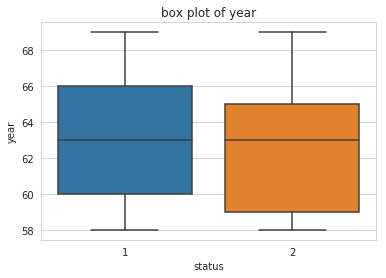

In [40]:
sns.boxplot(x='status',y='year',data=haberman)
plt.title('box plot of year')
plt.show()

# Violin plots

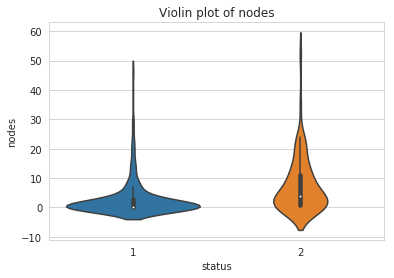

In [41]:
sns.violinplot(x='status',y='nodes',data=haberman,size=8)
plt.title('Violin plot of nodes')
plt.show()

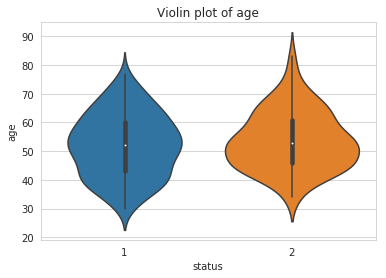

In [42]:
sns.violinplot(x='status',y='age',data=haberman,size=8)
plt.title('Violin plot of age')
plt.show()

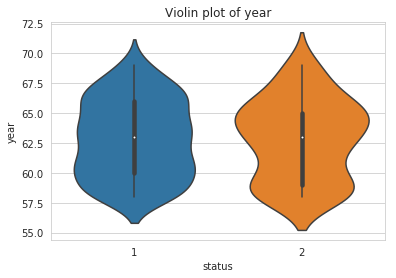

In [43]:
sns.violinplot(x='status',y='year',data=haberman,size=8)
plt.title('Violin plot of year')
plt.show()

Observations:
    
    - The number of nodes of the survivors is from 0 to 5.
    - Almost 75% of the patients have less than or equal to 5 nodes.
    - The patients treated after 1966 have the slightly higher chance to survive that the rest. 
      The patients treated before 1959 have the slightly lower chance to survive that the rest. 

Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

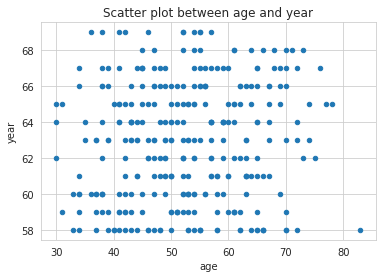

In [44]:
haberman.plot(kind='scatter',x='age',y='year')
plt.title('Scatter plot between age and year')
plt.show()

#This doesn't make any sense

Conclusion:

    Very hard to make sense out of it. 

# 2-D Scatter Plot

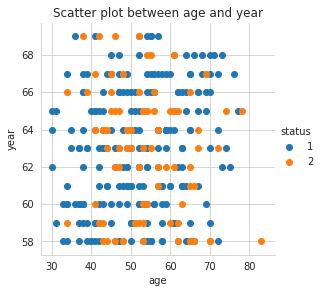

In [45]:
# We make it more clearly using seaborn 

sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','year').add_legend()
plt.title('Scatter plot between age and year')
plt.show()


Conclusion:

    Very hard to make sense as points are overlapping a lot.

# Pair-plot

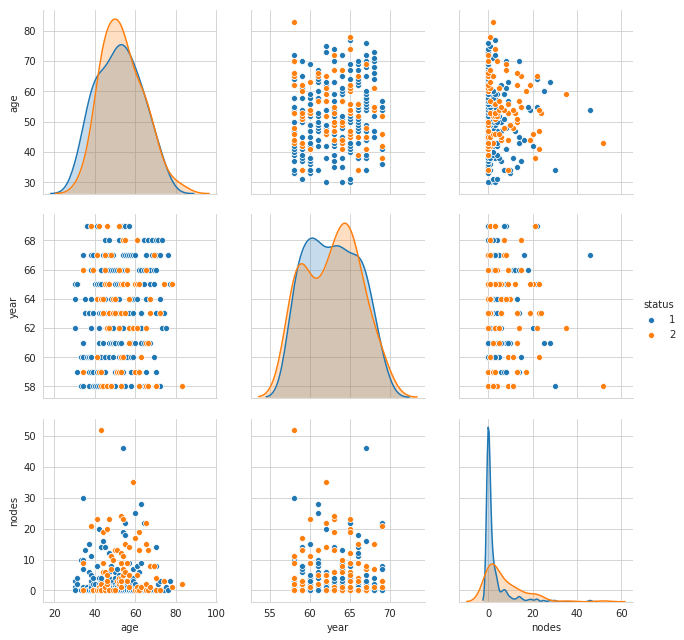

In [47]:
sns.set_style('whitegrid')
sns.pairplot(haberman,vars=['age','year','nodes'], hue='status',size=3)

plt.show()

Observation:
    
    1) Nodes are widely used feature to determine that patient is survied or not survived
    2) Year can also used feature to determint the treament of patient

Conclusion:
    
    - The age of the patients vary from 30 to 83 with the median of 52.
    - Although the maximum number of nodes observed is 52, nearly 75% of the patients have less than 5 
      nodes and nearly 25% of the patients have no nodes.
    - The data set contains only a small number of records (306).
    - The target column is imbalanced with 73% status is 1.
    - Nodes are widely used feature to determine that patient is survied or not survived.
    - Year can also used feature to determint the treament of patient.
    